Covid 19 Outbreak in Ontario

Data:Government of Canada Statistics/Public Health Agency of Canada
Status of COVID-19 cases in Ontario
    https://data.ontario.ca/dataset/status-of-covid-19-cases-in-ontario/resource/ed270bb8-340b-41f9-a7c6-e8ef587e6d11    
Confirmed positive cases of COVID19 in Ontario
    https://data.ontario.ca/dataset/confirmed-positive-cases-of-covid-19-in-ontario/resource/455fd63b-603d-4608-8216-7d8647f43350

Questions to be answered:

Temporal distribution of patients hospitalized (in or out of ICU/ventilator)

EDA of Demographic characteristics of the COVID-19 confirmed/deceased cases (Age group and gender)

In [1]:
# import libraries and packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go 
import cufflinks as cf
%matplotlib inline
import plotly.express as px

# For Notebooks
init_notebook_mode(connected=True)

Patients hospitalized out of ICU, and those in ICU with or without ventilator

In [2]:
# Hospitalized and in ICU with/out ventilator cases
# Assign url of file: url
url2='https://data.ontario.ca/dataset/f4f86e54-872d-43f8-8a86-3892fd3cb5e6/resource/ed270bb8-340b-41f9-a7c6-e8ef587e6d11/download/covidtesting.csv'
# Read file into a DataFrame
df=pd.read_csv(url2)

In [3]:
# Examine samples of the DataFrame
df.sample(5)

,Reported Date,Confirmed Negative,Presumptive Negative,Presumptive Positive,Confirmed Positive,Resolved,Deaths,Total Cases,Total patients approved for testing as of Reporting Date,Total tests completed in the last day,Under Investigation,Number of patients hospitalized with COVID-19,Number of patients in ICU with COVID-19,Number of patients in ICU on a ventilator with COVID-19
31,2020-03-08,2094.0,NaN,NaN,25.0,4.0,NaN,29.0,2178.0,NaN,55,NaN,NaN,NaN
90,2020-05-06,NaN,NaN,NaN,4071.0,13222.0,1429.0,18722.0,365675.0,12961.0,8790,1032.0,219.0,174.0
23,2020-02-27,672.0,NaN,1.0,2.0,3.0,NaN,5.0,699.0,NaN,21,NaN,NaN,NaN
56,2020-04-02,NaN,NaN,NaN,1909.0,831.0,53.0,2793.0,62733.0,NaN,2052,405.0,167.0,112.0
24,2020-02-28,739.0,NaN,1.0,3.0,3.0,NaN,6.0,768.0,NaN,22,NaN,NaN,NaN


In [4]:
# Examine the shape of the DataFrame
df.shape

(111, 14)

In [5]:
# Examine the summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 14 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Reported Date                                             111 non-null    object 
 1   Confirmed Negative                                        47 non-null     float64
 2   Presumptive Negative                                      12 non-null     float64
 3   Presumptive Positive                                      25 non-null     float64
 4   Confirmed Positive                                        109 non-null    float64
 5   Resolved                                                  99 non-null     float64
 6   Deaths                                                    71 non-null     float64
 7   Total Cases                                               109 non-null    float64
 8   Total patients appro

Data cleaning, data wrangling and EDA

In [6]:
# Change the Reported Date column name to date
df.rename(columns={'Reported Date':'date'}, inplace=True)

#Change the 'date' object to datetime
df.date = pd.to_datetime(df.date)

In [7]:
# Count the number of missing values in each column
print(df.isnull().sum())

date                                                         0
Confirmed Negative                                          64
Presumptive Negative                                        99
Presumptive Positive                                        86
Confirmed Positive                                           2
Resolved                                                    12
Deaths                                                      40
Total Cases                                                  2
Total patients approved for testing as of Reporting Date     6
Total tests completed in the last day                       69
Under Investigation                                          0
Number of patients hospitalized with COVID-19               56
Number of patients in ICU with COVID-19                     56
Number of patients in ICU on a ventilator with COVID-19     56
dtype: int64


As only the number of hospitalized patients (in or out of ICU) and deaths are accurate, drop the rest of the table. 

In [8]:
#Drop the 'Confirmed Negative', 'Presumptive Negative', 'Total tests completed in the last day', 'Under Investigation', 'Presumptive Positive', 'Confirmed Positive', 'Resolved', 'Total patients approved for testing as of Reporting Date', and 'Total Cases' columns
df.drop(['Confirmed Negative', 'Presumptive Negative','Total tests completed in the last day',  'Under Investigation', 'Presumptive Positive', 'Confirmed Positive', 'Resolved', 'Total patients approved for testing as of Reporting Date', 'Total Cases'], axis='columns', inplace=True)


In [9]:
df.tail()

,date,Deaths,Number of patients hospitalized with COVID-19,Number of patients in ICU with COVID-19,Number of patients in ICU on a ventilator with COVID-19
106,2020-05-22,2021.0,961.0,153.0,120.0
107,2020-05-23,2048.0,912.0,147.0,119.0
108,2020-05-24,2073.0,878.0,148.0,104.0
109,2020-05-25,2102.0,859.0,148.0,114.0
110,2020-05-26,2123.0,848.0,143.0,113.0


In [10]:
df.fillna(0, inplace=True)

In [11]:
df.head(50)

,date,Deaths,Number of patients hospitalized with COVID-19,Number of patients in ICU with COVID-19,Number of patients in ICU on a ventilator with COVID-19
0,2020-01-26,0.0,0.0,0.0,0.0
1,2020-01-27,0.0,0.0,0.0,0.0
2,2020-01-28,0.0,0.0,0.0,0.0
3,2020-01-30,0.0,0.0,0.0,0.0
4,2020-01-31,0.0,0.0,0.0,0.0
5,2020-02-03,0.0,0.0,0.0,0.0
6,2020-02-04,0.0,0.0,0.0,0.0
7,2020-02-05,0.0,0.0,0.0,0.0
8,2020-02-06,0.0,0.0,0.0,0.0
9,2020-02-08,0.0,0.0,0.0,0.0


No hospital information is available for the first few months.

In [12]:
df1=df[df['Number of patients hospitalized with COVID-19']!=0]

In [13]:
df1

,date,Deaths,Number of patients hospitalized with COVID-19,Number of patients in ICU with COVID-19,Number of patients in ICU on a ventilator with COVID-19
56,2020-04-02,53.0,405.0,167.0,112.0
57,2020-04-03,67.0,462.0,194.0,140.0
58,2020-04-04,94.0,506.0,196.0,152.0
59,2020-04-05,119.0,523.0,200.0,154.0
60,2020-04-06,132.0,589.0,216.0,160.0
61,2020-04-07,153.0,614.0,233.0,187.0
62,2020-04-08,174.0,605.0,246.0,195.0
63,2020-04-09,200.0,632.0,264.0,214.0
64,2020-04-10,222.0,673.0,260.0,217.0
65,2020-04-11,253.0,691.0,257.0,215.0


Hence, the hospital data are available only for April 2nd and after.

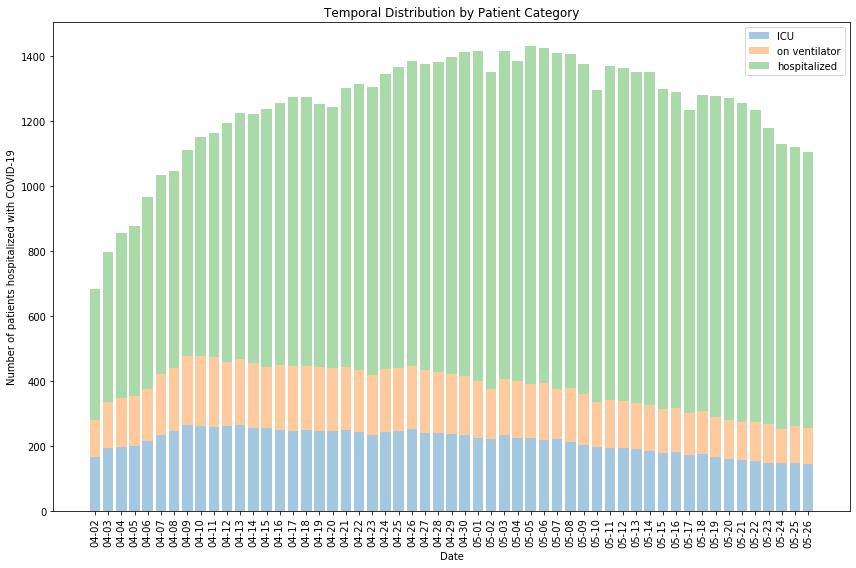

In [14]:
# Temporal distribution by patient category
fig, ax=plt.subplots(figsize=(12,8))
ax.bar(df1['date'], df1['Number of patients in ICU with COVID-19'],  alpha=0.4, label='ICU')
ax.bar(df1['date'], df1['Number of patients in ICU on a ventilator with COVID-19'], bottom=df1['Number of patients in ICU with COVID-19'], alpha=.4, label='on ventilator')
ax.bar(df1['date'], df1['Number of patients hospitalized with COVID-19'], bottom=df1['Number of patients in ICU with COVID-19']+df1['Number of patients in ICU on a ventilator with COVID-19'], alpha=.4, label='hospitalized')

ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Number of patients hospitalized with COVID-19')
ax.set_xticks(df1.date)
ax.set_xticklabels(df1.date.dt.strftime('%m-%d'),rotation=90)
ax.set_title('Temporal Distribution by Patient Category')
plt.tight_layout()

Demographic characteristics of COVID-19 cases 

In [15]:
#Confirmed positive cases of COVID19 in Ontario based on gender and age
url2='https://data.ontario.ca/dataset/f4112442-bdc8-45d2-be3c-12efae72fb27/resource/455fd63b-603d-4608-8216-7d8647f43350/download/conposcovidloc.csv'
df2=pd.read_csv(url2)

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26191 entries, 0 to 26190
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Row_ID                     26191 non-null  int64  
 1   Accurate_Episode_Date      26191 non-null  object 
 2   Age_Group                  26191 non-null  object 
 3   Client_Gender              26191 non-null  object 
 4   Case_AcquisitionInfo       26191 non-null  object 
 5   Outcome1                   26191 non-null  object 
 6   Outbreak_Related           26191 non-null  object 
 7   Reporting_PHU              26191 non-null  object 
 8   Reporting_PHU_Address      26191 non-null  object 
 9   Reporting_PHU_City         26191 non-null  object 
 10  Reporting_PHU_Postal_Code  26191 non-null  object 
 11  Reporting_PHU_Website      26191 non-null  object 
 12  Reporting_PHU_Latitude     26191 non-null  float64
 13  Reporting_PHU_Longitude    26191 non-null  flo

In [17]:
df2.sample(3)

,Row_ID,Accurate_Episode_Date,Age_Group,Client_Gender,Case_AcquisitionInfo,Outcome1,Outbreak_Related,Reporting_PHU,Reporting_PHU_Address,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Website,Reporting_PHU_Latitude,Reporting_PHU_Longitude
14933,14934,2020-03-22,60s,MALE,Neither,Not Resolved,(blank),Porcupine Health Unit,169 Pine Street South,Timmins,P4N 8B7,www.porcupinehu.on.ca,48.472510,-81.328750
18136,18137,2020-04-18,90s,FEMALE,Information pending,Resolved,Yes,Ottawa Public Health,100 Constellation Drive,Ottawa,K2G 6J8,www.ottawapublichealth.ca,45.345665,-75.763912
9184,9185,2020-04-11,50s,MALE,Information pending,Resolved,(blank),Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358


Data cleaning, data wrangling and EDA

In [18]:
# Change the Accurate_Episode_Date column name to date and Client_Gender column name to Gender
df2.rename(columns={'Accurate_Episode_Date':'date', 'Client_Gender':'Gender'}, inplace=True)

In [19]:
df2.head()

,Row_ID,date,Age_Group,Gender,Case_AcquisitionInfo,Outcome1,Outbreak_Related,Reporting_PHU,Reporting_PHU_Address,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Website,Reporting_PHU_Latitude,Reporting_PHU_Longitude
0,1,2020-04-29,50s,FEMALE,Information pending,Resolved,Yes,Peel Public Health,7120 Hurontario Street,Mississauga,L5W 1N4,www.peelregion.ca/health/,43.647471,-79.708893
1,2,2020-05-09,20s,FEMALE,Information pending,Resolved,Yes,Peel Public Health,7120 Hurontario Street,Mississauga,L5W 1N4,www.peelregion.ca/health/,43.647471,-79.708893
2,3,2020-05-17,30s,FEMALE,Contact of a confirmed case,Not Resolved,Yes,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358
3,4,2020-05-09,20s,MALE,Contact of a confirmed case,Resolved,Yes,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358
4,5,2020-05-17,30s,FEMALE,Contact of a confirmed case,Not Resolved,Yes,Renfrew County and District Health Unit,7 International Drive,Pembroke,K8A 6W5,www.rcdhu.com,45.799406,-77.118727


In [20]:
# change the type of age group and gender from object to category
df2.Gender= df2.Gender.astype('category')
df2.Age_Group= df2.Age_Group.astype('category')

In [21]:
df2.date.unique()

array(['2020-04-29', '2020-05-09', '2020-05-17', '2020-03-09',
       '2020-05-23', '2020-05-22', '2020-05-16', '2020-05-20',
       '2020-03-14', '2020-03-08', '2020-03-19', '2020-03-28',
       '2020-05-21', '2020-05-13', '2020-05-18', '2020-03-05',
       '2020-04-17', '2020-04-16', '2020-04-21', '2020-05-07',
       '2020-03-24', '2020-04-01', '2020-05-12', '2020-03-23',
       '2020-05-25', '2020-05-14', '2020-04-22', '2020-03-17',
       '2020-05-15', '2020-04-30', '2020-04-15', '2020-04-27',
       '2020-03-07', '2020-05-19', '2020-03-20', '2020-03-31',
       '2020-03-30', '2020-03-13', '2020-04-12', '2020-03-15',
       '2020-04-09', '2020-04-05', '2020-05-06', '2020-04-10',
       '2020-04-11', '2020-04-19', '2020-03-27', '2020-05-24',
       '2020-03-10', '2020-03-21', '2020-04-24', '2020-04-13',
       '2020-03-11', '2020-03-16', '2020-05-11', '2020-05-08',
       '2020-04-03', '2020-05-01', '2020-04-25', '2020-04-14',
       '2020-01-24', '2020-05-10', '2020-03-25', '2020-

In [22]:
df2.drop(df2[df2.date == '3009-12-29'].index, axis=0, inplace=True)

In [23]:
#Change the 'date' object to datetime
df2.date = pd.to_datetime(df2.date)

In [24]:
# Sort the table based on the date
df2.sort_values(by='date')

,Row_ID,date,Age_Group,Gender,Case_AcquisitionInfo,Outcome1,Outbreak_Related,Reporting_PHU,Reporting_PHU_Address,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Website,Reporting_PHU_Latitude,Reporting_PHU_Longitude
7974,7975,2020-01-01,80s,MALE,Neither,Resolved,(blank),Haldimand-Norfolk Health Unit,12 Gilbertson Drive,Simcoe,N3Y 4N5,www.hnhu.org,42.847825,-80.303815
2251,2252,2020-01-01,50s,MALE,Contact of a confirmed case,Resolved,(blank),"Region of Waterloo, Public Health",99 Regina Street South,Waterloo,N2J 4V3,www.chd.region.waterloo.on.ca,43.462876,-80.520913
25979,25980,2020-01-10,40s,FEMALE,Contact of a confirmed case,Resolved,Yes,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358
6643,6644,2020-01-15,60s,MALE,Information pending,Resolved,(blank),Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358
14270,14271,2020-01-21,50s,MALE,Travel-Related,Resolved,(blank),Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5146,5147,2020-05-25,90s,FEMALE,Contact of a confirmed case,Not Resolved,(blank),Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358
42,43,2020-05-25,50s,FEMALE,Neither,Not Resolved,(blank),Peel Public Health,7120 Hurontario Street,Mississauga,L5W 1N4,www.peelregion.ca/health/,43.647471,-79.708893
6171,6172,2020-05-25,60s,MALE,Information pending,Not Resolved,(blank),Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358
6292,6293,2020-05-25,60s,FEMALE,Information pending,Not Resolved,(blank),Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358


In [25]:
# Find the count of resolved, not resolved and fatal cases
df2.Outcome1.value_counts()

Resolved        19958
Not Resolved     4108
Fatal            2123
Name: Outcome1, dtype: int64

In [26]:
# Find the percent of resolved, not resolved and fatal cases
round(df2.Outcome1.value_counts(normalize=True),3)*100

Resolved        76.2
Not Resolved    15.7
Fatal            8.1
Name: Outcome1, dtype: float64

Gender Distribution of confirmed cases?

In [27]:
# confirmed cases based on gender
df2.Gender.value_counts()

FEMALE         14678
MALE           11285
UNKNOWN          216
OTHER              7
TRANSGENDER        3
Name: Gender, dtype: int64

In [28]:
# percent of confirmed cases based on gender
round(df2.Gender.value_counts(normalize=True),3)*100

FEMALE         56.0
MALE           43.1
UNKNOWN         0.8
OTHER           0.0
TRANSGENDER     0.0
Name: Gender, dtype: float64

In [29]:
# Age group of Confirmed cases with unknown gender
Confirmed_GenderUnknown_Ages=df2[(df2.Gender=='UNKNOWN')]['Age_Group']

round(Confirmed_GenderUnknown_Ages.value_counts(normalize=True),3)*100

80s        25.0
90s        23.1
<20         9.7
70s         9.7
40s         9.3
60s         7.4
30s         7.4
50s         4.6
20s         3.2
Unknown     0.5
Name: Age_Group, dtype: float64

Demographic characteristics of deceased cases

In [30]:
# create a table of Deceased cases based on date, age group and gender
Deceased=df2[df2.Outcome1=='Fatal'][['date','Age_Group','Gender']].sort_values('date')
Deceased

,date,Age_Group,Gender
19067,2020-03-01,90s,FEMALE
12679,2020-03-01,70s,FEMALE
14012,2020-03-03,60s,MALE
13339,2020-03-04,50s,MALE
19839,2020-03-04,70s,FEMALE
...,...,...,...
16549,2020-05-17,80s,FEMALE
15758,2020-05-17,80s,FEMALE
21473,2020-05-18,80s,FEMALE
5779,2020-05-18,60s,MALE


In [31]:
# percent of deceased cases based on gender
round(Deceased.Gender.value_counts(normalize=True),3)*100

FEMALE         52.6
MALE           46.2
UNKNOWN         1.3
TRANSGENDER     0.0
OTHER           0.0
Name: Gender, dtype: float64

In [32]:
# percent of deceased cases based on age group
round(Deceased.Age_Group.value_counts(normalize=True),3)*100

80s        36.7
90s        32.8
70s        18.0
60s         8.1
50s         3.2
40s         0.8
30s         0.3
20s         0.1
Unknown     0.0
<20         0.0
Name: Age_Group, dtype: float64

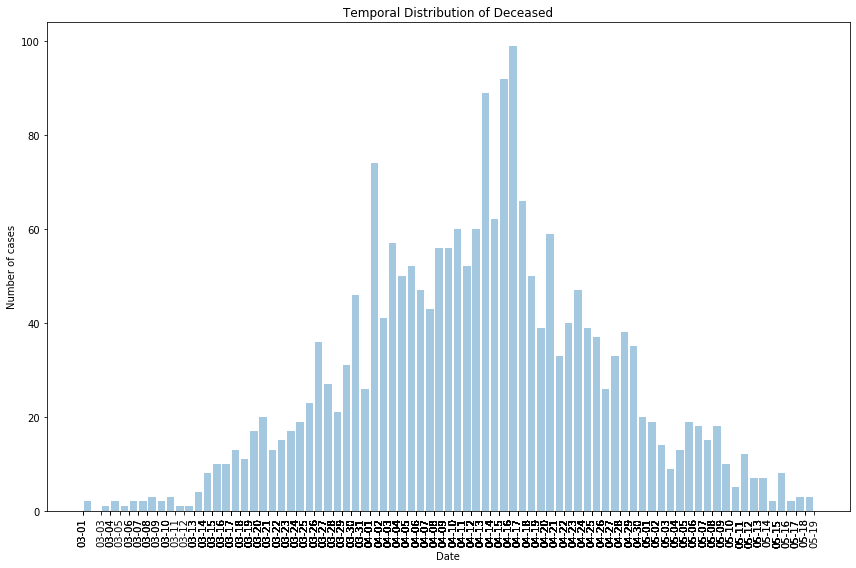

In [33]:
fig, ax=plt.subplots(figsize=(12,8))
ax.hist(Deceased['date'],alpha=0.4,rwidth= .8, bins=len(Deceased['date'].unique()))
ax.set_xlabel('Date')
ax.set_ylabel('Number of cases')
ax.set_xticks(Deceased.date)
ax.set_xticklabels(Deceased.date.dt.strftime('%m-%d'),rotation=90)
ax.set_title('Temporal Distribution of Deceased')
plt.tight_layout()

In [34]:
# Interactive temporal plot deseased count 

fig = px.histogram(Deceased, x="date")
fig.update_layout(title_text='Interactive Temporal Distribution of Deceased', barmode='group', xaxis_tickangle=-45, xaxis_title='Date', yaxis_title='Number of Cases')

fig.show()

In [35]:
Deceased['Female'] = Deceased.Gender=='FEMALE'
Deceased['Male'] = Deceased.Gender=='MALE'
Deceased['Unknown'] = Deceased.Gender=='UNKNOWN'
Deceased_G=Deceased[Deceased['Age_Group']!='Unknown'].groupby(['Age_Group'], as_index=False)[['Female','Male','Unknown']].agg(sum)
Deceased_G

,Age_Group,Female,Male,Unknown
0,20s,1.0,1.0,0.0
1,30s,0.0,6.0,0.0
2,40s,5.0,13.0,0.0
3,50s,24.0,43.0,0.0
4,60s,62.0,109.0,0.0
5,70s,144.0,234.0,4.0
6,80s,413.0,355.0,12.0
7,90s,467.0,219.0,11.0
8,<20,0.0,0.0,0.0
9,Unknown,0.0,0.0,0.0


In [36]:
# Demographic Characteristics of deseaces cases based on the gender and age group
Deceased_G=Deceased[Deceased['Age_Group']!='Unknown'].groupby(['Age_Group'], as_index=False)[['Female','Male','Unknown']].agg(sum)

In [37]:
Deceased_G

,Age_Group,Female,Male,Unknown
0,20s,1.0,1.0,0.0
1,30s,0.0,6.0,0.0
2,40s,5.0,13.0,0.0
3,50s,24.0,43.0,0.0
4,60s,62.0,109.0,0.0
5,70s,144.0,234.0,4.0
6,80s,413.0,355.0,12.0
7,90s,467.0,219.0,11.0
8,<20,0.0,0.0,0.0
9,Unknown,0.0,0.0,0.0


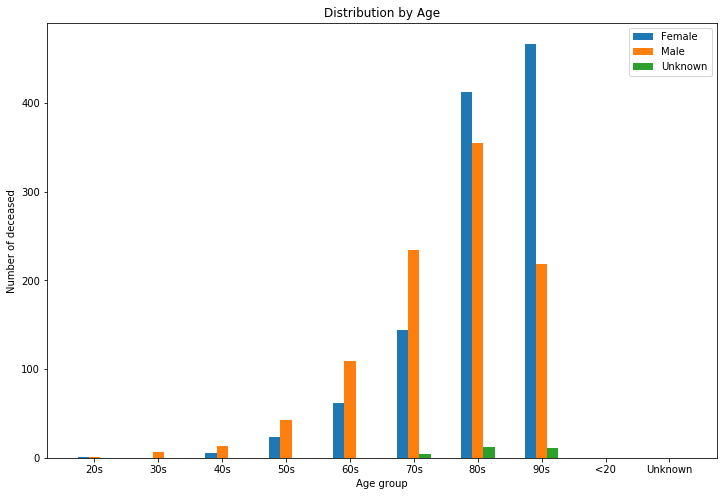

In [38]:
#plot deceased age_gender distribution
x = np.arange(len(Deceased_G['Age_Group']))  
width = 0.35  
fig, ax=plt.subplots(figsize=(12,8))
ax.bar(x - width/2, Deceased_G['Female'], width/2, label='Female')
ax.bar(x, Deceased_G['Male'], width/2, label='Male')
ax.bar(x + width/2, Deceased_G['Unknown'], width/2, label='Unknown')
 
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Age group')
ax.set_ylabel('Number of deceased')
ax.set_title('Distribution by Age')
ax.set_xticks(x)
ax.set_xticklabels(Deceased_G.Age_Group)
ax.legend()


In [39]:
# Interactive plot deceased age_gender distribution
fig = go.Figure(data=[
    go.Bar(name='Female', x=Deceased_G.Age_Group, y=Deceased_G.Female),
    go.Bar(name='Male', x=Deceased_G.Age_Group, y=Deceased_G.Male),
    go.Bar(name='Unknown', x=Deceased_G.Age_Group, y=Deceased_G.Unknown)    
])

fig.update_layout(title_text='Deceased Age_Gender Distribution', barmode='group', xaxis_tickangle=-45, xaxis_title='Age Group', yaxis_title='Number of Cases')
fig.show()

Conclusion: 
Based on the report of StatCan https://www150.statcan.gc.ca/n1/pub/91-215-x/2018002/sec2-eng.htm, women outnumber men for the age group of 65plus. Hence. despite the higher rate of confirmed and deceased cases in older women we cannot conclude that women are more likely to be infected by Covid-19.